In [1646]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


#from cairosvg import svg2png
from IPython.display import display, HTML, SVG, Image, IFrame, Video
import base64
from bs4 import BeautifulSoup
import re
import json

In [1647]:
w = 1400
h = 700

# Mapbox
mapbox_access_token = 'pk.eyJ1IjoibW9rbW9rIiwiYSI6ImNqMjBiZmE5ZzAwMXkyd29jYzFraXdwMDMifQ.920tRBkBcRY3rIF7ue6NPw'
mapstyle = "carto-positron"
center_xy = center = go.layout.mapbox.Center(lon=7.45, lat=48.3)
margin = {'l': 100, 'b': 5, 't': 70, 'r': 40}
bgcolor = 'rgba(0,0,0,0)'

legend = dict(
    x=0.95,
    xanchor="right",
    y=0.9,
    yanchor="bottom",
    title_font_family="Arial",
    orientation="h",
    font=dict(size=13),
    traceorder = 'normal',
)


renderer_list = ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode','notebook', 'notebook_connected', 'kaggle', 'azure',
                 'colab','cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg','pdf', 'browser', 'firefox', 'chrome',
                 'chromium', 'iframe', 'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

renderer = 'notebook_connected'
#renderer = 'jupyterlab'

footer = """<div class="fa-solid fa-lungs"> </div> <div class="fa-solid fa-arrows-to-circle"></div> <div class="fa-solid fa-helicopter"></div> Séminaire d'équipe CESP 04/04/2022"""

class color():
    bleu = "#1f77b4"
    orange = '#ff7f0e'
    vert = '#2a9d8f'
    rouge = '#e63946'
    violet = '#9467bd'
    marron = '#8c564b'
    rose = '#e377c2'
    gris = '#7f7f7f'
    vert2 = '#bcbd22'
    turquoise = '#17becf'
    bc = '#eee8d5'
    
font = dict(
    size=14,
    color= color.bc,
    family="Arial"
)


---

# Apport de la géographie de la santé et de la modélisation spatiale aux problématiques d’attribution des organes en transplantation
<br>

---

<br>
<div class="container">
        <div class="row align-middle">
          <div class="col">
              <div class=" cblanc" style="padding-top: 35px;">
                <div class="fas fa-lungs"> </div>
                <div class="fas fa-arrows-to-circle"></div> 
                <div class="fas fa-helicopter"></div> 
                Florian Bayer <br> Thèse sous la direction du docteur Christian Jacquelinet
            </div>
          </div>
          <div class="col">
             <img src="./assets/images/logo.png" width="100%" style="float:right"/>
          </div>
        </div>
</div>

<font color='red' size=4 >

Madame la présidente du jury, je vous remercie de me donner la parole. Madame, Messieurs les membres du jury, je tiens à vous remercier vivement d’être présents aujourd’hui pour évaluer ma recherche doctorale en recherche clinique, innovation technologique, santé publique.
    
Mon travail concerne l'Apport de la géographie de la santé et de la modélisation spatiale aux problématiques d’attribution des organes en transplantation  
- comme vous le voyez, santé publique, transplantation, géographie, statistique :  j'ai cherché à composer un jury un peu à l'image de cette thèse et de ma vision de la géographie : conforme à une approche multidisciplinaire


</font>

---

<h1> <i class="fas fa-globe"></i> La géographie</h1>

<br>

<div class="r-stack">
	<div class="fragment fade-out" style="width: 1200px;">
        <blockquote class="fs-3" style="width: 1200px;">« Tout le monde croit que la géographie n’est qu’une discipline scolaire et universitaire dont la fonction serait de fournir des éléments d’une description du monde, dans une certaine conception “désintéressée” de la culture dite générale » </blockquote>
        <blockquote class="fs-4" style="width: 1200px;">Yves Lacoste La géographie, ça sert, d’abord, à faire la guerre. La Découverte ; 1976</blockquote>
    </div>
    <div class="fragment fade-in-then-out" style="width: 1200px;">
        <blockquote class="fs-3" style="width: 1200px;">La science qui applique l'approche spatiale à l’ensemble des autres sciences</blockquote>
    </div>
</div>

<font color='red' size=4>
    
- J'ai choisi d'introduire cette thèse avec une citation d'Yves Lacoste tirée de La géographie, ça sert, d’abord, à faire la guerre

Il nous dit : 
    
« Tout le monde croit que la géographie n’est qu’une discipline scolaire et universitaire dont la fonction serait de fournir des éléments d’une description du monde, dans une certaine conception “désintéressée” de la culture dite générale » 
    
- Et 46 ans après, cette citation reste toujours aussi percutante quand à l'idée que l'on se fait de la géographie en France

- Pour ma part, j'ai toujours vécu la géographie comme une science multidisciplinaire,
---   
- soit la science qui applique l'approche spatiale à l’ensemble des autres sciences.
        
- C'est cette vision que j'ai souhaité mettre en avant en rédigeant cette thèse, en abordant à travers le prisme spatial, la santé publique et l'épidémiologie. L'épidémiologie étant la science qui étudie des facteurs influant sur la santé et les maladies de population.

    
</font>

---

<h1><i class="fas fa-puzzle-piece"></i> Les enjeux de la géographie en greffe d'organes traités dans cette thèse</h1>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/I_plan_1.png" alt="..." width=100%>
       </div>
   </div>  
</div>

<font color='red' size=4>
Ma thèse porte sur les enjeux de la géographie en transplantation, deux mondes qui semblent pourtant bien distinct
    
- Je vais donc résumer dans un premier temps les principaux enjeux qui existent entre la greffe d'organes et la géographie, j'y présenterai mes hypothèses et axes de recherches pour y répondre. Nous verrons qu'un greffon est une ressource rare et fragile, qui impose des faire des choix ; en lien avec des enjeux géographiques 

</font>

---

## Des règles pour objectiver des critères de choix d'allocation d'une ressource rare

<div class="container">
   <div class="row" >
       <div class="text-center">
           <div class="r-stack">
              <img src="./assets/images/I_principes_1.png" class="fragment current-visible" alt="..." width=80%>
              <img src="./assets/images/I_principes_2.png" class="fragment" alt="..." width=80%> 
          </div>
       </div>
   </div>  
</div>

<font color='red' size=4>
    
Deux points de contextes structure les enjeux et les motifs à agir de cette thèse:
- Premièrement, la pénurie : il y a plus de nouveaux inscrits que de greffons disponibles sur la même période. Cette situation conduit à l'accumulation des malades sur la liste nationale d'attente et à l'augmentation du nombre de décès sur liste.
- Deuxièmement, l'absence de méthode de conservation des organes sur une longue durée donne ce caractère urgent à la transplantation
    - Cette urgence se mesure entre autres par la durée d'ischémie froide, la période pendant laquelle un greffon n’est plus vascularisé et privé d’apport en nutriments et en oxygène. Elle impacte la survie du greffon et donc du receveur.
    - un cœur verra sa reprise de fonction primaire se dégrader à partir de 3h d'ischémie froide.

--- 
Le processus global de la greffe se déroule comme ceci : les nouveaux malades sont inscrits sur une liste d'attente, nationale en France. Lorsqu'un donneur est qualifié, l'allocation des greffons aux receveurs est faite afin de déclencher le processus de la greffe. C'est une mission du Pole National de Répartition des greffons de l'Agence de la biomédecine. Le PNRG.
    
Aujour'hui, nos sociétés réclament d'être efficaces, juste (équité) et transparents. En greffe, ces principes ont pour socles les règles de répartition, élaborer par l'Agence de la biomédecine et ses partenaires. 
- Ses règles ont un cadre légal 
- et ont pour finalité d'objectiver des critères de choix lors de l'allocation d'une ressource rare.    

---
    
Ses règles de répartition se décomposent selon deux dimensions 
- un dimension médicale qui peut être faite : 
    - par l'attribution d'un organe à une équipe et le médecin décide du receveur dans sa liste (réduite à l'équipe)
    - par l'attribution d'un organe à un patient à l'aide d'un score basé sur des composante biologique, qui vise à maximiser un critère : 
        - la survie sur liste 
        - ou post-greffe
- La seconde dimension est géographique
    - attribue le greffon dans des zone selon des maillages emboîtés, on propose à l'équipe de proximité, puis à un tour des équipes d'une zone intermédiaire avant de passer à un tour national des équipes 
    - calcul la distance entre le site de prélèvement et le greffe : distance continue

Ces contraintes mélangeant pénurie, urgence, approche clinique et géographie ne sont pas sans poser des défis. Travaillant à l'Agence de la biomédecine, mes démonstrations s'appuient sur des exemples français, mais ces enjeux concernent la plupart des organisations en charge de la greffe

</font>

---

## Les motifs à agir : l'inadéquation spatiale de l'offre et des besoins

<div class="container">
   <div class="row" >
       <div class="text-center">
           <p>Disparités spatiales de l’offre et des besoins en greffe pulmonaire entre 2013 et 2018</p>
           <img src="./assets/images/PO_offre_besoin.png" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>

Le premier de ces défis que j'ai étudié est l'inadéquation spatiale des l'offre et des besoins en greffe
    
Si je représente à l'aide de deux cartes la localisation entre 2013 et 2018:
- du nombre de prélèvement pulmonaires 
- du nombre de nouveaux inscrits en greffe pulmonaires
- j'obtiens d'un côté une mesure de l'offre, de l'autre des besoins.
L'interprétation géographique de ces nombres bruts montrent
- que la majorité des prélèvements se font en IDF (plus de pop), mais c'est une vision qui est souvent oublié
- il existe des disparité spatiale : plus d'offre à l'ouest, mais plus de besoin à l'est
    
Si la répartition des greffons se fait dans des zones d'allocations figées dans l'espace : 
- le greffon est attribué en priorité à l'équipe sa zone de prélèvement, 
- il y a donc un risque de voir apparaître des disparités d'accès à la greffe. 
    
Nous sommes face à un problème d'équité d'accès aux soins d'un bien rare. 
    
</font>

---

## Les motifs à agir : réduction des possibilités d'appariement

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/I_appariement.png" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>

Le second de ces défis concerne l'impact que peut avoir la géographie sur un score d'allocation patient.

- Prenons un greffon hépatique prélevé dans la zone A. Il sera proposé en premier à l'équipe de la zone A
- Pourtant, c'est l'équipe de la zone B qui est la plus proche. Mais n'étant pas dans la même zone, elle n'accède pas en premier au greffon en lien avec un effet de frontière
- Cela pose également question si l'équipe de la zone B a dans sa liste un malade urgent, l'équipe de la zone A ayant un malade moins grave.
Autrement dit, le modèle géographique peut réduire les possibilités d'appariement
- de moins bons candidats à la greffe peuvent accéder aux greffons, aux contraire de meilleure candidat qui ne sont pas dans la "bonne" zone
- ce qui peut avoir un impact sur la survie des malades sur liste ou post-greffe
    
Nous sommes face à un problème d'équité d'accès aux soins et d'efficacité.   
 

</font>

---

## Les motifs à agir : des durées de trajets qui peuvent être optimisées

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/I_ischemie.png" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>

Le dernier défis concernent la logistique du transport qui fait face à de nouvelles difficultées 
    
Les transports entre le site de prélèvement et de greffe, ceux qui impactent la durée d'ischémie froide, se font soit en ambulance, soit par avion privé + ambulance. Pour les rein tgv ou vol air france, mais ce point n'est pas traité dans cette thèse

- Si la durée d'ischémie froide chute continuellement depuis plusieurs années, elle semble avoir atteint un palier en greffe cardiaque avec 3h30 en moyenne et un écart-type de 50 minutes.

- Les aéroports sont de moins en moins accessibles, alors que les allocations se font de plus en plus à l'échellon national
    
- Nous sommes face à un problème de faisabilité et d'efficacité en santé publique

    
</font>

---

## Allouer dans l'urgence une ressource rare impose de faire des choix

<div class="r-stack">
  <img src="./assets/images/I_EEF_1.png" class="fragment fade-in-then-out" alt="..." width="50%">
  <img src="./assets/images/I_EEF_2.png" class="fragment" alt="..." width="50%">
</div>





<font color='red' size=4>
    
Pour résumer, la greffe d'organes doit faire face à une double contrainte pénurie / urgence.
  
Or, pour allouer une ressource rare, il est nécessaire de faire des choix.

- Doit-on privilégier les territoires qui ont mis l'accent sur l'activité de recensement des donneurs ?
- Faut-il aller plus loin pour mieux apparier le receveur et le donneur ? Avec le risque d'augmenter la durée d'ischémie froide
- Faut-il prioriser les durées de trajets courtes pour minimiser la durée d'ischémie froide ?
    
Je ne répondrais pas à ces questions à la frontière de l'équité et de l'éthique, qui sont hors du champs de cette thèse, mais elles laissent entrevoir une problématique majeure et souvent oubliée en transplantation, à savoir

--- 
    
- que les systèmes d'attribution des greffons reposent sur un équilibre entre principes d'équité, d'efficacité et de faisabilité
    
---
    
- Mais qui peuvent être annihilés par des modèles géographiques inadaptés    
    
</font>

---

## Hypothèses testées

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/I_Hypotheses.png" alt="..." width=75%>
       </div>
   </div>  
</div>

<font color='red' size=4>

Trois hypothèses sont testées pour répondre à ces motifs à agir 
- Il est possible de rationaliser la construction de la dimension spatiale des règles d'allocation
- Il est possible d'objectiver le role de cette dimension spatiale
- Le compromis équité/efficacité/faisabilité des systèmes d'allocation peut être optimisé par la géographie
</font>

---

<h1><i class="fas fa-lungs"></i> Optimiser l’équité d’accès des équipes de transplantation aux greffons dans le cas d'une gestion de la distance discrète</h1>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/I_plan_2.png" alt="..." width=100%>
       </div>
   </div>  
</div>

<blockquote style="width: 1200px;"> 
Bayer, F., Dorent R., Cantrelle C., Legeai C., Kerbaul F. & Jacquelinet,C. France’s new lung transplant allocation system : combining equity with proximity by optimizing geographic boundaries through the supply / demand ratio. Transplant International.
</blockquote>

<blockquote style="width: 1200px;"> 
Bayer, F., Jacquelinet, C. Cantrelle, C. Legeai, C., Kerbaul, F., & Dorent, R. (2022, April). Impact of the New French Lung Allocation System on Geographic Disparities : The 3-month Results. ISHLT 2022
</blockquote>

<blockquote style="width: 1200px;"> 
Algorithme disponible sur Github : https://github.com/fbxyz/area-optimization
</blockquote>


<font color='red' size=4>
       
J'ai choisi de vous présenter en premier l'étude sur la mise en place de zones de prélèvement "optimisées" en greffe pulmonaire.
    
Il ne s'agit pas ici d'optimiser à l'aide de la géographie la survie sur liste ou post-greffe, qui n'est pas tellement un sujet pour cet organe : il y a peu de pénurie, ce n'est pas une greffe vitale pour la majorité des indications, mais une amélioration majeure de la qualité de vie.
    
En revanche, l'adéquation entre offre et besoin en greffe est une problématique majeure des organisations en charge de la transplantation dans le monde, notamment pour des questions d'équité d'accès aux greffons pour les patients. 

</font>

---

### L'allocation aux équipes : exemple de la greffe pulmonaire

<div class="container">
    <div class="text-center">
      <img src="./assets/images/intro_tours.png" class="rounded" alt="..." width=80%>
    </div>
</div>

<font color='red' size=4>
    
En France, les poumons sont, avec le pancréas, les derniers organes qui suivent un système d'allocation sous la forme d'un tour des équipes dans des zones discrètes du fait de la faible pénurie et de l'absence de consensus sur un score d'allocation patient. 

L'allocation se déroule de la façon suivante :
- Si un greffon pulmonaire est qualifié à Bayonne, il sera proposé aux malades dont le pronostic vital est menacé à très court terme. Il n'y a pas de modèle géographique, l'urgence prime sur la distance.
- S'il n'y a pas de receveur urgent qualifié pour ce greffon, il est proposé à l'équipe de transplantation de la zone à laquelle appartient Bayonne : Bordeaux. On parle de réseau de prélèvement local.
- le greffons est ensuite proposé aux équipes du maillage supérieur selon un tour régional
- Enfin, la proposition est faite selon un tour national des équipes.

</font>

---

## Motifs à agir : une inéquité d'accès aux greffons inter-équipes

<div class="r-stack">
  <img data-fragment-index="0" src="./assets/images/PO_model0.png" width="auto" height="450">
</div>

<font color='red' size=4>

Je parlais en introduction de l'impact des modèles géographiques sur l'adéquation entre l'offre et les besoins
    
La carte présentée correspond au  premier niveau de maillage: le niveau local représentés par des réseaux locaux
- Chaque point est un site de prélèvement. La couleur correspond à l'équipe de transplantation du réseau local
- par exemple en vert, l'ancien réseau de l'équipe de Nantes
- on constate que la taille de ces zones de prélèvement est très variable selon les équipes.
- or je vous ai dit que l'épidémiologie du prélèvement pulmonaire était très spatialement différente de celles des inscrits
    
Pour mesurer l'adéquation entre offre et besoins, nous pouvons calculer le rapport entre: 
- le nombre de greffons prélevés dans un réseau local sur une période : offre (environ 400 pour Nantes)
- et le nombre de nouveaux inscrits par l'équipe de transplantation de la même zone sur la même période : besoins (environ 120 pour Nantes)
- Pour de multiples raisons que je pourrais expliquer plus tard, nous prenons ici le nombre de greffés et non le nombre d'inscrits pour les besoins

En relativisant l'offre et les besoins, on constate que
- le réseaux de l'équipe de transplantation de Nantes dispose de 3 fois plus de greffons pulmonaires que de greffés entre 2013 et 2018
- Dans les équipes parisiennes, ce ratio est de 0.1
    
Avoir un ratio offre/besoin élevé permet d'avoir plus fréquemment des propositions et donc de choisir le meilleur donneur pour son receveur :
- on peut questionner l'équité de la situation en terme de santé publique

</font>

<font color='red' size=4>
    
</font>

---

<h2><i class="fas fa-circle-question"></i> Hypothèse </h2>


<blockquote class="fs-3" style="width: 1200px;">
Les zones de prélèvement de greffons peuvent être optimisées spatialement afin de satisfaire un critère d’équité inter-équipe
</blockquote>    

---

<blockquote class="fs-4" style="width: 1200px;">
Cette hypothèse est challengée par une évaluation de type <font color='#E45756'> avant</font> / <font color='#088EA7'> après</font> en greffe pulmonaire
</blockquote>   


<font color='red' size=4>

Les zones de prélèvement de greffons peuvent être optimisées spatialement afin de satisfaire un critère d’équité inter-équipe
Cette hypothèse est challengée par une évaluation de type <font color='#E45756'> avant</font> / <font color='#088EA7'> après</font> en greffe pulmonaire

</font>

---

## Solution proposée : optimiser la taille des réseaux en fonction de l'offre et des besoins

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/PO_methodo_anim.png" class="rounded" alt="..." width=100%>
       </div>
   </div>  
</div>

<font color='red' size=4>

L'idée est d'optimiser la taille des réseaux de prélèvement en équilibrant l'offre et des besoins
    
Je teste toutes les combinaisons possibles de réseau de prélèvement pour chaque équipe de greffes
- un site de prélèvement en vert ne peut appartenir au réseau que d'une seule équipe de transplantation en rouge
- le nombre de greffon prélevés sur la période est indiqué, ainsi que le nombre de greffes pour l'équipe
- à chaque combinaison, calcul: 
    -le ratio prélèvement du réseau testé / nombre de greffes de l'équipe 
    -la variance et la moyenne des 3 ratios

Le calcul de ces combinaisons est un problème NP-complet (résolution passe par un processus exponentiel, mais la solution est rapide à vérifier)
Pour des contraintes de temps, j'ai résolu ce problème par un algorithme force-brute sous contraintes
- Le critère d'optimisation est la minimisation de la variance des ratios offre/besoin entre les équipes 
- les contraintes du modèles sont :
    - une moyenne du ratio proche de 0.5
    - une distance maximum entre l'équipe de greffe et le site de prélèvement de 2h
    
</font>

---

### Résultats : conception des nouveaux réseaux

<div class="container">
   <div class="row" >
           <div class="r-stack">
              <img src="./assets/images/PO_model0.png" class="fragment fade-in-then-out" alt="..." width="1344" height="835.52">
              <img src="./assets/images/PO_model1.png" class="fragment fade-in-then-out" alt="..." width="auto" height="700">
              <img src="./assets/images/PO_model2.png" class="fragment fade-in-then-out" alt="..." width="auto" height="700">
          </div>
       </div>
</div>  


<font color='red' size=4>
    
Plusieurs solutions ont été proposées et discutées avec les équipes de greffe pulmonaires
- la première carte correspond aux anciens réseaux
- le modèle 1 est celui qui répond le mieux à notre critère d'optimisation : la variance est très proche de 0, toutes les équipes ayant des ratios proches de 0.5. Sauf Strasbourg, en lien avec l'épidémiologie du prélèvement faible dans l'est
- le modèle 2 celui qui a été retenu, après ajustement 
    - suite à de nombreux échanges avec les équipes. Des compromis sur ce modèle ont été faits
    - Il y avait la volonté de certaines équipes de garder des sites dans leurs réseaux locaux (maintien de l'activité de prélèvement, raison historique, conventions)
    - Si ce n'est pas le meilleur, ce modèle reste toutefois plus équitable que la situation originale.


</font>

---

### Evaluation des nouveaux réseaux : population et méthodes

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/PO_eval_methodo.png" class="rounded" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>

Ces réseaux locaux dits optimisés ont été mis en place en septembre 2020
    
- Comme dans l'article qui vient d'être publier, je les ai évaluer à un an (contre 6 mois dans le manuscrit) : de septembre 2020 à septembre 2021 vs septembre 2018 à septembre 2019 : PO impacté par épidémie SARS-Cov2
    
- Comme pour toutes les études présentées aujourd'hui, j'ai utilisé la base de données Cristal qui contient toutes les informations sur les donneurs et receveurs. Nous l'utilisons pour l'allocation des greffons, le suivi avant et post-greffe
    
- Analyse univariée acitvité des équipes, distances parcourues, durée d'ischémie froide (tests appariés)
- survie sur la liste : prise en compte de risques concurrents avec un estimateur d'Aalen-Johansen et non Fine and Gray (pas d'ajustement).
- La première analyse a été faite avec seulement les incidents, mais nous voulions voir avec mon directeur de thèse si l'ajout des prévalents introduisait de la concurrence. L'idée étant de les ajouter comme des patients supplémentaires, sans prendre en compte leur historique en les censurant à gauche. Le T0  est bien à chaque fois au moment de l'inclusion dans la période
- test de Gray , mais ne prend pas en compte la présence de certains individus dans les deux cohortes
- En terme de volume : 14 prévalents inclus dans la première période, 25 dans la seconde avec 3 malades sur les deux périodes

Est-ce que cela change les résultats ? non, les résultats sont identiques avec et sans les prévalents.
    
- post-greffe avec un estimateur de KM. Log-rank test
    
Comme pour les autres études, je présenterai une sélection des résultats, le but de cette soutenance n'étant pas d'être exhaustif


</font>

---

### Résultats : pas de changement sur l'activité et la logistique des équipes


<div class="container">
    <div class="row">
      <div class="col">
          <div class="card nb">
                <div class="row no-gutters">
                    <div class="col-auto nb">
                        <i class="fas fa-grip-lines-vertical fa-5x img-fluid"></i>
                    </div>
                    <div class="col nb">
                        <div class="card-block px-2">
                            <p class="card-text font-weight-bold">Activité</p>
                            <p class="card-text">Pas de changement relatif d'activité entre les équipes</p>
                            <p class="card-text">Local: <font color='#e45756'>19</font> à <font color='#088ea7'>14%</font></p>
                            <p class="card-text">National: <font color='#e45756'>48</font> à <font color='#088ea7'>60%</font></p>
                        </div>
                    </div>
                </div>
          </div>
      </div>
      <div class="col">
          <div class="card nb">
                <div class="row no-gutters">
                    <div class="col-auto nb"> 
                        <i class="fas fa-truck-medical fa-5x"></i>
                    </div>
                    <div class="col nb">
                        <div class="card-block px-2">
                            <p class="card-text font-weight-bold">Logistique</p>
                            <p class="card-text nb">Pas de différence sur les distances (<font color='#e45756'>432</font> à <font color='#088ea7'>406 km</font> en moyenne, p=0,36)</p>
                            <p class="card-text nb">Réduction de 15 minutes de la durée d'ischémie froide moyenne (p=0.06)</p>
                        </div>
                    </div>
                </div>
          </div>
      </div>
    </div>
</div>  

<font color='red' size=4>
    
- Baisse logique des attribuation locales de 19 à 14%, ce qui reste modéré
- Augmentation des allocations nationales de 48 à 60%, en lien aussi avec la disparition du tour régional
    
</font>

---

### Résultats : sans impacter la survie sur liste et post-greffe

In [1648]:
f = open("./assets/json/po_survie_lna.json")
survie_lna = json.load(f)

fig_lna = go.Figure(
    data=survie_lna['data'],
    layout=survie_lna['layout']
)

f = open("./assets/json/po_survie_post.json")
survie_lna = json.load(f)

fig_post = go.Figure(
    data=survie_lna['data'],
    layout=survie_lna['layout']
)

In [1649]:
fig = make_subplots(rows=1, cols=2,
                   subplot_titles=("Probabilité d’évènement de décès/retraits et de greffes à 3 mois", "Survie post-greffe à 3 mois"))

for i in fig_lna.data : 
    i['line']['width']=3
    fig.add_trace(i, 
        row=1, col=1,
    )
    
for i in fig_post.data : 
    i['line']['width']=3
    fig.add_trace(i,
        row=1, col=2
    )
    
fig.update_traces(hovertemplate=None)
fig.update_xaxes(title_text="Nombre de jours depuis l'inscription",
                 range=[0, 92],
                 dtick=30,
                 showgrid=False,
                 row=1, col=1)

fig.update_yaxes(title_text="",
                 range=[0, 1.05],
                 tickformat=',.0%',
                 row=1, col=1)

fig.update_xaxes(title_text="Nombre de jours depuis la greffe",
                range=[0, 92],
                 dtick=30,
                 showgrid=False,
                 row=1, col=2)

fig.update_yaxes(title_text="",
                 range=[0, 1.05],
                 tickformat=',.0%',
                 row=1, col=2)

fig.update_layout(margin=margin,
                  hovermode="x",
                  font_color=color.gris,
                  legend = dict(
                      x=0.42,
                      xanchor="right",
                      y=0.77,
                      yanchor="bottom",
                      title_font_family="Arial",
                      orientation="v",
                      font=dict(size=13),
                      traceorder = 'normal',
                      bgcolor = None
                  ),
                  font=font,
                  title_x=0.5,
                  plot_bgcolor=bgcolor,
                  paper_bgcolor=bgcolor,
                  width=w,
                  height=h,
                  )


fig.show(renderer=renderer,config={'displayModeBar': False})

<font color='red' size=4>
    
- Pas de changement avant/après sur la survie sur liste (zoomer sur les déces)
- ou post-greffe à 3 mois

</font>

---

### Résultats : une amélioration de l'équité d'accès aux greffons pulmonaire

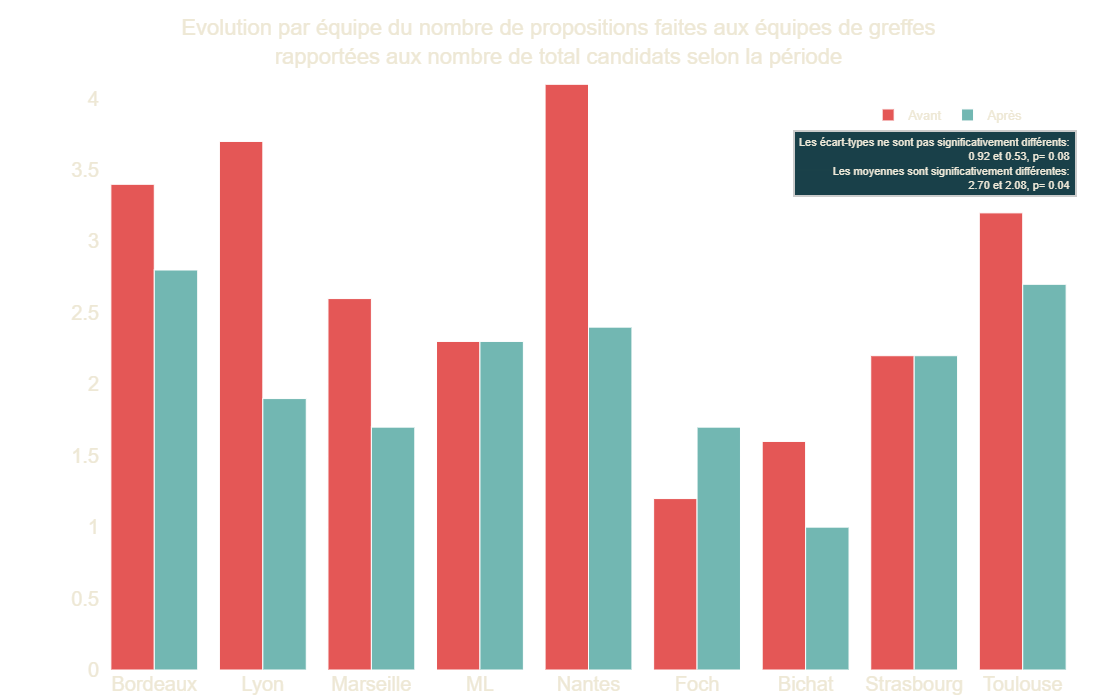

In [1650]:
f = open("./assets/json/po_propositions.json")
proposition = json.load(f)
proposition['data'][0]['x'] = ['Bordeaux','Lyon','Marseille','ML','Nantes','Foch','Bichat','Strasbourg','Toulouse']
proposition['data'][1]['x'] = ['Bordeaux','Lyon','Marseille','ML','Nantes','Foch','Bichat','Strasbourg','Toulouse']
proposition['layout']['annotations'][0]['bgcolor'] = '#002b36'

#proposition['data'][0]['marker']['color'] = 'rgba(255,255,255,0.5)'
#proposition['data'][1]['marker']['color'] = 'rgba(255,255,255,0.9)'

fig_prop = go.Figure(
    data=proposition['data'],
    layout=proposition['layout']
)

fig_prop.update_layout(hovermode="closest",
                      font_color=color.gris,
                      font=font,
                      title_x=0.5,
                      title_font_size=22,
                      xaxis = dict(tickfont = dict(size=20)),
                      yaxis = dict(tickfont = dict(size=20)),
                      plot_bgcolor=bgcolor,
                      paper_bgcolor=bgcolor,
                      width=w,
                      height=h,
                  )

        

fig_prop.update_layout(yaxis_tickformat = '')
fig_prop.show(config={'displayModeBar': False})

<font color='red' size=4>
    
En termes de résultats, il n’y a pas de changement significatif sur l'activité des équipes, sur les distances parcourues, la survie sur liste, l'accès à la greffe et la survie post-greffe. Une baisse à la limite de la significativité pour la durée d'ischémie froide, -15 minutes en moyenne. Concernant l'activité de greffe et la survie, ses résultats s'observent aussi bien pour l'ensemble des équipes que pour chaque équipe.
    
Le principal changement se trouve dans le nombre de propositions faites aux équipes de greffe, rapporté au total candidats de l'équipe sur la période. nouveaux inscrits + malades restant en attente sur chaque période
    
Sur la période avant, l'équipe de Nantes avait en moyenne 4,1 propositions de greffons pulmonaires pour 1 candidat sur liste. 2.4 un an après la mise en place des nouveaux réseaux

Le rééquilibrage des réseaux de prélèvement à permi de réduire les disparités inter équipes
    
- avec une baisse à la limite de la significativité de l'écart-type 0,92 à 0,53 (levene) : ce que l'on cherchait à faire. La baisse de la variance est bien un critère d'équité, même si une variance sur 9 individus est critiquable à raison au niveau puissance.
        
</font>

---

## Optimiser l'équité d'accès à la greffe dans des zones d'allocations : conclusion

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/PO_conclusion.png" alt="..." width=100%>
       </div>
   </div>  
</div>




<font color='red' size=4>

En conclusion, les principaux apports scientifiques sont les suivants : 
- Il s'agit d'une méthode simple à mettre en place, généralisation et ajustable. L'algorithme a été réutilisé pour d'autres études et est mis à disposition sur github
- Sa finalité est compréhensible par tous : ajuster la taille des réseaux en fonction de l'offre et des besoins
- Il y a une forte appétence à l'international pour ses modèles. Beaucoup visent à optimiser les distances, certains l'offre (avoir un même nombre de prélèvement)
- L'originalité de ce travail étant l'ajout de l'adéquation offre/besoin
    
Les limites portent sur la résolution d'un problème NP-complet par une méthode force brute sous contrainte
- J'ai pu tester différents algorithme, dont des heuristiques knapsack, mais qui ne donnait que le meilleur résultat
- Je n'ai pas pu poursuivre dans cette voie faute de temps, mais l’algorithme disponible sur Github est optimisé. Pour les 9 équipes de greffe et un peu moins de 200 sites de prélèvement, le problème est résolu en moins de 5 minutes. Mais il n’est pas possible d’ajouter plus de 20 sites de prélèvement par équipe de bref sans explosion combinatoire. Des regroupements d'établissements permettent de contourner cette limite 
- J'aurais également souhaité utiliser des heuristiques en topologie. Je n'ai pas pu, mais mes recherches m'ont beaucoup aidé sur d'autres études, notamment sur la mise en place de regroupement de centre de dialyse pour l'évaluation ainsi que pour des propositions de nouveaux schémas interrégionaux de l'offre de soins en greffe.

</font>

---

<h1><i class="fas fa-arrows-to-circle"></i> Optimiser la gestion de la distance continue à l'aide d'un modèle gravitaire</h1>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/I_plan_3.png" alt="..." width=100%>
       </div>
   </div>  
</div>

<blockquote style="width: 1200px;"> 
Bayer, F., Audry, B., Antoine, C., Jasseron, C., Legeai, C., Bastien, O., & Jacquelinet, C. (2020). Removing administrative boundaries using a gravity model for a national liver allocation system. American Journal of Transplantation.
</blockquote>

<blockquote style="width: 1200px;"> 
Bayer, F., Audry, B., Jacquelinet, C.Using a gravity model for organ allocation in France. 17th International Medical Geography Symposium. Du 2 au 7 Juillet 2017.
</blockquote>

<blockquote style="width: 1200px;"> 
</blockquote>


<font color='red' size=4>

La seconde étude porte sur l'optimisation la gestion de la distance continue à l'aide d'un modèle gravitaire. 
    
L'objectif est de faire un compromis entre l'urgence et la distance, afin d'améliorer l'efficacité des scores d'allocation mais aussi leur équité.


</font>

---

## Contexte : le score foie jusqu'en 2011

<div class="container">
    <div class="text-center">
      <img src="./assets/images/intro_score.png" class="rounded" alt="..." width=80%>
    </div>
</div>

<font color='red' size=4>
   
Tendance depuis 15 ans à utiliser des scores d'allocations patient pour les classer : foie, coeur et rein 
    
Après les séquences d'urgences et locales, application du score d'allocation
- une combinaison de fonction mathématiques basée sur les bilans médicaux des malades qui compte pour 1000 points 
- Foie pour les cirrhoses isolée, on utilise le MELD : 
    - 40, 100% de risque de dc dans les 3 mois
    - 14 ou moins, il y a plus de risque de décéder de l'opération que d'attendre sur la liste : il ne faut pas les greffer
    - C'est donc un critère d'efficacité évoqué précédemment : il est utilisable pour minimiser les décès sur liste
    - Le score foie vise donc à greffer en "juste-à-temps"
- **S'ajoute** à la dimension médicale la dimension géographique :
    - calcul de la distance entre le site de prélèvement et de greffe
    - une fonction décroissante de la distance donne de 300 à 0 points

Jusqu'en 2011

</font>

---

## Motifs à agir

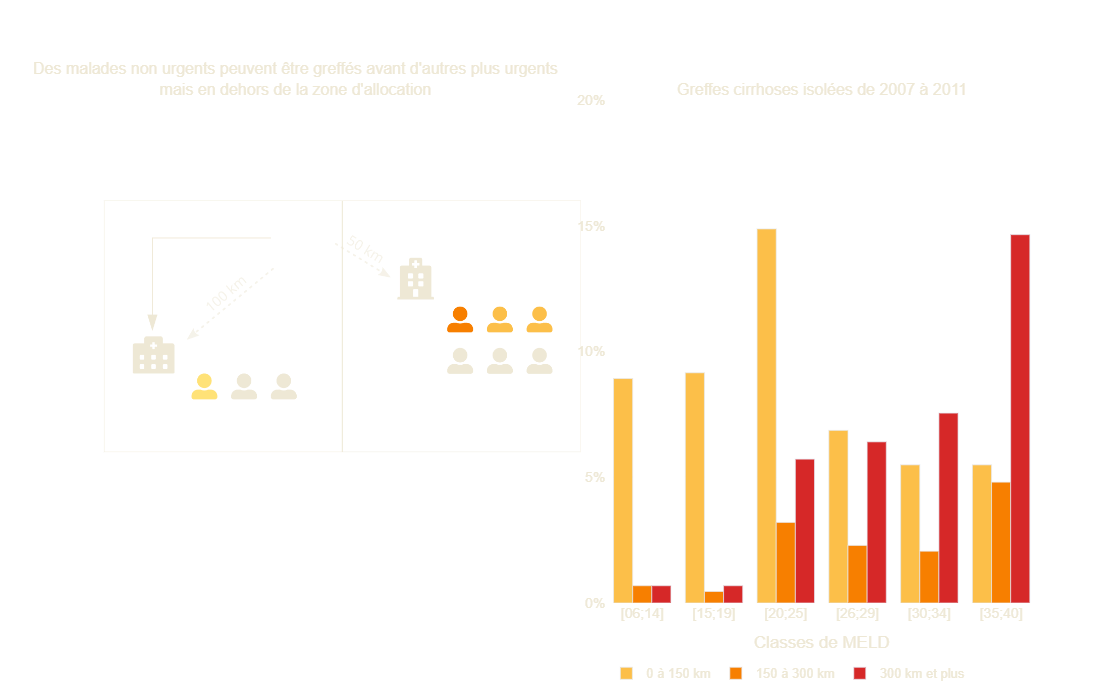

In [1651]:
df_meld = pd.read_json("./assets/json/df_F_MELDKM.json")
df_foie_cirrh_av = df_meld.query("period=='av'")
df_foie_cirrh_av = df_foie_cirrh_av.copy()
df_foie_cirrh_av['color'] = np.where(df_foie_cirrh_av['CLASSE_KM_VOITURE']=='0 à 150 km','#fcbf49',
                                     np.where(df_foie_cirrh_av['CLASSE_KM_VOITURE']=='150 à 300 km','#f77f00',
                                     '#d62828'))

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Des malades non urgents peuvent être greffés avant d'autres plus urgents<br>mais en dehors de la zone d'allocation",
                    "Greffes cirrhoses isolées de 2007 à 2011"),
    vertical_spacing=0.075
)


for c in df_foie_cirrh_av.CLASSE_KM_VOITURE.unique():
    fig.add_trace(go.Bar(name=c,
                       x=df_foie_cirrh_av.query(f"CLASSE_KM_VOITURE=='{c}'").CLASSE_MELD,
                       y=df_foie_cirrh_av.query(f"CLASSE_KM_VOITURE=='{c}'").p,
                       marker_color= df_foie_cirrh_av.query(f"CLASSE_KM_VOITURE=='{c}'").color),
                  1,2)

    
fig.update_layout(barmode='group')

fig.update_xaxes(title_text="Classes de MELD")

fig.update_yaxes(title_text="Cirrhoses isolées greffées au Score national ou local (% du total)",
                 range=[0, 0.2],
                 tickformat=',.0%')
fig['layout']['yaxis2']['title']=""

fig.update_layout(hovermode="closest",
                  font_color=color.gris,
                  font=font,
                  title_x=0.5,
                  title_y=0.85,
                  plot_bgcolor=bgcolor,
                  paper_bgcolor=bgcolor,
                  width=w,
                  height=h,
                  legend=dict(
                    orientation='h',
                    bgcolor=bgcolor,
                    bordercolor=bgcolor,
                    font=dict(size=13),
                    yanchor="top",
                    y=-0.11,
                    xanchor="left",
                    x=0.55
                ),
            )


fig.update_layout(
                images= [
                    dict(
                    source='https://i.imgur.com/icfPU4F.png',
                    xref="paper", yref="paper",
                    x=0.025, y=0.8, 
                    sizex=0.5, sizey=0.5,
                    xanchor="left",
                    yanchor="top",
                    sizing="contain",
                    layer="below")    ])

fig.show(config={'displayModeBar': False})


<font color='red' size=4>
    
Je l'évoquais dans les motifs à agir :  un jour donnée, la maximisation du critère défini par un score ne peut pas être atteinte si le choix des receveurs est limité à la seule liste de l'équipe

- Des malades non urgents peuvent être greffés avant d'autres plus urgent, car en dehors du réseau local

Les effets des ces problèmes sont visibles dans ce graphique 
- de la répartition des greffes pour les cirrhose isolée, par classe de MELD et par classe de distance
- Lorsque j'ai présenté le score foie, j'ai précisé que pour les cirrhoses isolées, la greffe de malades MELD inférieur ou égal à 14 était à proscrire
- Mais le modèle géographique l'autorisait
- De plus, les malades les plus graves semblaient être surtout greffés avec des greffons venant de plus loin
- Comme nous le verrons plus tard, les modèles géographiques additifs ne sont pas assez discriminants

Nous nous retrouvons donc ici face à un problème d'équité d'accès aux greffons et d'efficacité des règles de répartition. Le principe de la greffe en juste-à-temps du score fois est perturbée par le modèle géographique


</font>

---

## Motifs à agir (1)

In [1652]:
local = [0.119 , 0.1401, 0.2257, 0.2384, 0.2857, 0.313 , 0.4286, 0.4341,
       0.4444, 0.5021, 0.5469, 0.5475, 0.5556, 0.6042, 0.7078, 0.7434,
       0.7455, 0.7632, 0.7836, 0.8261]
eqp = ['P.Brousse', 'Beaujon', 'Rennes', 'H.Mondor', 'Caen', 'St Antoine', 'Tours',
       'La Pitié', 'Strasbourg', 'Lyon', 'Besançon', 'Montpellier', 'Limoges', 'Clermont-Ferrand',
       'Lille', 'Marseille', 'Bordeaux', 'Grenoble', 'Toulouse', 'Nice']

fig = make_subplots(
    rows=1, cols=2, subplot_titles=(" ",
                                    "Part du local pour l'ensemble des greffes<br>hépatiques entre janvier 2007 et février 2011"),
    vertical_spacing=0.075
)

fig.add_trace(go.Bar(x=eqp, y=local),row=1,col=2)


fig.update_traces(marker_color= color.bc, marker_line_color='rgba(255,255,255,1)',
                  marker_line_width=1.5, opacity=1)

fig.update_yaxes(title_text="",
                 range=[0, 1.05],
                 tickformat=',.0%')

fig.update_layout(hovermode="closest",
                      font_color=color.gris,
                      font=font,
                      title_x=0.5,
                      plot_bgcolor=bgcolor,
                      paper_bgcolor=bgcolor,
                      width=w,
                      height=h,
                  )


fig.update_layout(
                images= [
                    dict(
                    source='https://i.imgur.com/qTI7f7n.png',
                    xref="paper", yref="paper",
                    x=0, y=0.8, 
                    sizex=0.5, sizey=0.5,
                    xanchor="left",
                    yanchor="top",
                    sizing="contain",
                    layer="below")    ])

fig.show(renderer=renderer,config={'displayModeBar': False})


<font color='red' size=4>
    
Pénurie conjoncturelle : un jour donnée, la maximisation du critère défini par un score ne peut pas être atteint si le choix des receveurs est limité à la seule liste de l'équipe
    
<b>Problèmes liés aux modèles géographiques:</b>
- D'efficacité du score sur un nombre restreint de candidats
- D'équité d'accès aux greffons
- Des malades non urgents peuvent être greffés avant d'autres plus urgent, en dehors de la zone d'allocation
- Les modèles géographiques additifs ne sont pas assez discriminants   

</font>

---

## Hypothèse 

<blockquote class="fs-3" style="width: 1200px;">
Une interaction entre l’urgence de la greffe et la distance conduit à la réduction de la mortalité sur liste ou post-greffe
</blockquote>    

---

<blockquote class="fs-4" style="width: 1200px;">
Cette hypothèse est challengée par une évaluation de type <font color='#E45756'> avant</font> / <font color='#088EA7'> après</font> en greffe hépatique
</blockquote>  

<font color='red' size=4>

Une interaction entre l’urgence de la greffe et la distance conduit à la réduction de la mortalité sur liste ou post-greffe
Cette hypothèse est challengée par une évaluation de type <font color='#E45756'> avant</font> / <font color='#088EA7'> après</font> en greffe hépatique
    
</font>

---

## Solution proposée : mise en place et évaluation d'un modèle gravitaire pour l'allocation des greffons

> « Tout interagit avec tout, mais deux objets proches ont plus de chances de le faire que deux objets éloignés » 
>
> Waldo Tobler "A computer movie simulating urban growth in the Detroit region." 1970.

<font color='red' size=4>

Pour cela, j'ai utilisé un modèle gravitaire issue des principes de l'interaction spatiale

Ces principes peuvent être résumés par une citation de Tobler, désignée comme la première loi de la géographie :  
    
Tout interagit avec tout, mais deux objets proches ont plus de chances de le faire que deux objets éloignés
    
</font>

---

### Méthodologie : conception du modèle gravitaire

<div class="row">
    <div class="column" style=" float: left;width: 45%; margin-right:15px;">
    \begin{equation}
        \Large F=G\times\frac{m_{i}\times m_{j}}{d_{ij}{^{2}}}
    \end{equation}
    \begin{align} \nonumber 
        \\
    \large F&: \large \mbox{Force d'attraction} \nonumber \\
    \large G&: \large \mbox{Constante gravitationnelle} \nonumber \\
    \large m_i&: \large \mbox{Masse de i} \nonumber \\
    \large m_j&: \large \mbox{Masse de j} \nonumber \\
    \large d_{ij}&: \large \mbox{Distance entre i et j} \nonumber 
    \end{align}
    </div>
    <div class="column" style=" float: left;width: 45%; margin-right:15px;">
        \begin{equation}
\Large Score\:Foie=\frac{Score\:Foie\:Hors\:Distance}{\exp{0,4\times\frac{D^{0,15}}{\sqrt{K}}}}
\label{equ:mgfoie}
\end{equation}
</div>
</div>

<font color='red' size=4>

- Modèle très utilisé en géomarketing : Analogie avec la loi de gravitation de Newton : la force d'attraction est égale au produit des masses de deux corps divisé par la distance au carré
- On n'ajoute plus à la fonction médicale la fonction de la distance, mais on divise le score foie hors distance par la distance
- Les paramètres ont été calibrés par itérations de simulation à partir de cohortes historiques, puis nous avons fait des tests avec Benoit Audry sur sa plateforme de simulation en fonction de scénarios que je lui proposais. Nous avons conservé les freins qui satisfaisaient à un critère de maximisation de la survie sur liste.  
- Je ne rentre pas plus ici dans les paramètres de cette fonction de la distance, nous pourrons revenir dessus lors de la séance de questions        
- Compléments :    
    - il n'y a pas de masse du donneur, qui pourrait s'apparenter à la qualité du greffon : il faudrait une mesure de cette qualité, et il est difficile de connaître l'état du greffon avant que le prélèvement débute
    - la fonction de la distance est anisotrope dans un espace euclidien (terme que j'ai peu à peu éclipsé au fil du temps suite aux regards étonnés des transplanteurs). Autrement dit, l'espace n'a pas les mêmes propriétés selon les équipes 
    - offre une compensation pour les équipes en position frontalière et donc de satisfaire une certaine équité d'accès aux greffons
    - a distance égale, l'équipe de strasbourg aura moins d'opportunité de prélèvement qu'une équipe parisienne
    - J'utilise également une fonction exponentielle modifiée permet de paramétrer finement le frein de la distance
    - ce frein est essentiel car il permet de déterminer le compromis entre l'urgence et la distance
        - Pour illustrer : pour acheter une baguette, le frein de la distance est élevé. On ne fait pas 10 km pour une boulangerie
        - Pour les fêtes, je suis prêt à faire 10 km pour acheter un gâteau chez Conticini ou Lignac. Le frein de la distance est plus faible

</font>

---

### Méthodologie : principes de l'interaction spatiale
  
<div class="container">
    <div class="text-center">
      <img src="./assets/images/F_principesMG.png" class="rounded" alt="..." width=100%>
    </div>
</div>

<font color='red' size=4>

- Effet de taille : à distance égale, l'importance des relations entre deux lieux est proportionnelles à leurs capacités d'émission et de réception
- Effet de distance : A poids égal, l'importance des relations entre 2 lieux est **inversement** proportionnelle à leur distance
- loi de la gravitation de newton
- appliquée à la géo : physique sociale, en vogue dans les années 40
- modélise bien des flux, modèle utilisé en géomarketing

    
</font>

---

### Le rôle de la plateforme de simulation

<div class="row">
    <div class="column" style=" float: left;width: 45%; margin-right:15px;">
        <img style="margin-right:0px;margin-top:0px;" src="./assets/images/C_calage.png" width="auto" height="500" />
    </div>
    <div class="column" style=" text-align:center; float: left;width: 42.5%; margin-right:15px;">
        <img style="margin-right:0px;margin-top:0px;" src="./assets/images/C_sim.png" width="auto" height="500" />
    </div>
</div>

<font color='red' size=4>

Remarques sur la plateforme de simulation et l'ajustement du frein de la distance dans le modèle gravitaire
- l'idée est de se baser sur les déplacements existants pour déterminer un frein observé de la distance à l'aide d'une regression de Poisson
    
</font>

---

### K équipe

  
<div class="container">
    <div class="text-center">
      <img src="./assets/images/F_keqp.png" class="rounded" alt="..." width=100%>
    </div>
</div>

---

### Illustrations des effets du modèle gravitaire

In [1653]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Ancien modèle : tous les receveurs<br>à 900 points sauf à Lille = 1 000 points",
                    "Modèle gravitaire: tous les receveurs<br>à 900 points sauf à Lille = 1 000 points"
                   ),
    specs=[[{"type": "surface"}, {"type": "surface"}]],)


z_data_v3 = pd.read_feather("./assets/feather/Plot3d_LILLE_v3.feather")
z_data_1000 = pd.read_feather("./assets/feather/Plot3d_LILLE_1000.feather")

fig.add_trace(
    go.Surface(z=z_data_v3.values,colorscale='YlOrRd',
                                 reversescale=True,
                                 showscale=False),row=1, col=1
)

fig.add_trace(
    go.Surface(z=z_data_1000.values,colorscale='YlOrRd',
                                 cmin=-500,cmax=-400,reversescale=True,
                                 showscale=False),row=1, col=2
)

fig.update_layout(
    margin=dict(r=10, t=50, b=10, l=10),
    font_color=color.gris,
    font=font,
    title_x=0.5,
    plot_bgcolor=bgcolor,
    paper_bgcolor=bgcolor,
    width=w,
    height=h,
    hovermode=False
)

fig.show(renderer=renderer,config={'displayModeBar': False})

<font color='red' size=4>

- Illustration de la mise en concurrence entre les patients
- Ici, un seul patient représenté par équipe pour des raisons de simplicité
- Patient à Lille avec un score foie hors distance 1000 points, les autres à 900
- A gauche, l'ancien modèle additif, à droite le modèle gravitaire
    - avec l'ancien modèle, aucune compétition : le malade de lille attire tous les greffons du territoire
    - avec le MG, introduit de la compétition : zone d'influence du patient de lille est la plus grande, mais les autres équipes peuvent également attirer le greffon s'il est assez proche


</font>

---

### Illustrations des effets du modèle gravitaire (2)

In [1654]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Modèle gravitaire : receveurs<br>entre 500 et 1000 points",
                    "Modèle gravitaire : tous les receveurs<br>à 900 points sauf à Lille = 1 000 points"
                   ),
    specs=[[{"type": "surface"}, {"type": "surface"}]],)

z_data_random = pd.read_feather("./assets/feather/Plot3d_random_mg.feather")
z_data_1000 = pd.read_feather("./assets/feather/Plot3d_LILLE_1000.feather")

colorscale = ["#fec44f","#fe9929","#fc4e2a","#e31a1c","#bd0026","#800026"]

fig.add_trace(
    go.Surface(z=z_data_random.values,colorscale='YlOrRd',
                                 cmin=-500,cmax=-400,reversescale=True,
                                 showscale=False),row=1, col=1
)

fig.add_trace(
    go.Surface(z=z_data_1000.values,colorscale='YlOrRd',
                                 cmin=-500,cmax=-400,reversescale=True,
                                 showscale=False),row=1, col=2
)

fig.update_layout(
    margin=dict(r=10, t=50, b=10, l=10),
    font_color=color.gris,
    font=font,
    title_x=0.5,
    plot_bgcolor=bgcolor,
    paper_bgcolor=bgcolor,
    width=w,
    height=h,
    hovermode=False
)


fig.show(renderer=renderer,config={'displayModeBar': False})

<font color='red' size=4>

- Évolution constante en fonction du score des malades
- Peut voir ça comme une zone d'allocation patient dont la taille évolue en fonction de son score hors distance
- le patient de Toulouse est un bon candidat à la greffe, mais moins urgent que les autres. Il pourront attirer le greffon si ce dernier est très proches

</font>

---

### Evaluation du modèle gravitaire : population et méthodes

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/F_eval_methodo.png" class="rounded" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>

Mise en place du MG en 2011.  Evaluation 4 ans avant et 4 ans après
- analyses univariées
  
- Survie sur liste, Aalen-Johansen. Inclusion des prévalents et des incidents, également pour le Cause specific HR. Comme pour le poumon, le fait d'avoir les mêmes malades sur la première et seconde période (794) n'a pas été pris en compte dans les tests.
    
- Survie post-greffe, modèle de Cox ajusté sur le DFG à la greffe et l'intubation, sur l'individu de référence. Le DFG et l'intubation sont de bons prédicteurs de survie post-greffe utilisés dans les publications de l'Agence. 

Compléments :     
- représente 9 et 18 % des deux cohortes pour l'étude sur le score foie
    
</font>

---

### Résultats : Baisse de l'incidence des décès et retraits sur liste pour aggravation

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/F_BLR.png" class="rounded" alt="..." width=40%>
       </div>
   </div>  
</div>

<font color='red' size=4>

Baisse non significative de l'incidence des décès pour des questions de puissances, mais tendance visible
    
</font>

---

### Résultats : prise en compte des risques concurrents sur la liste nationale d'attente

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/F_pre_grf.png" class="rounded" alt="..." width=100%>
       </div>
   </div>  
</div>

<font color='red' size=4>
    
Un résultat majeur du MG est la réduction d'environ 15% des décès sur liste après la mise en place du modèle, qui peut s'expliquer par une meilleure redistribution en juste à temps des greffons
    
Si je m'intéresse à la prise en compte des risques concurrents sur la liste nationale d'attente
    
- sur la probabilité d'événements de décès sur liste 
    - Réduction des décès est maintenant identique par classe de MELD : amélioration de l'efficacité et de l'équité du score foie
- Priorisation de l'accès à la greffe des malades en fonction de la classe de MELD, ici tous malades confondus ce qui explique qu'il y ai des malades MELD inf14 qui accèdent à la greffe

Complément    
- L'analyse du Cause-specific hazard ratio de montre, après ajustement sur la classe de MELD, un effet protecteur du modèle gravitaire (CHR = 0,84 [0,73; 0,96] p-value = 0,01).
    
</font>

---

### Résultats : modèle de Cox post-greffe

<div class="container" style = "background-color: #eee8d5;">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/table/CauseSpecific_HR.png" class="rounded" alt="..." width=80%>
       </div>
   </div>  
</div>

---

### Résultats : redistribution des allocations en juste-à-temps

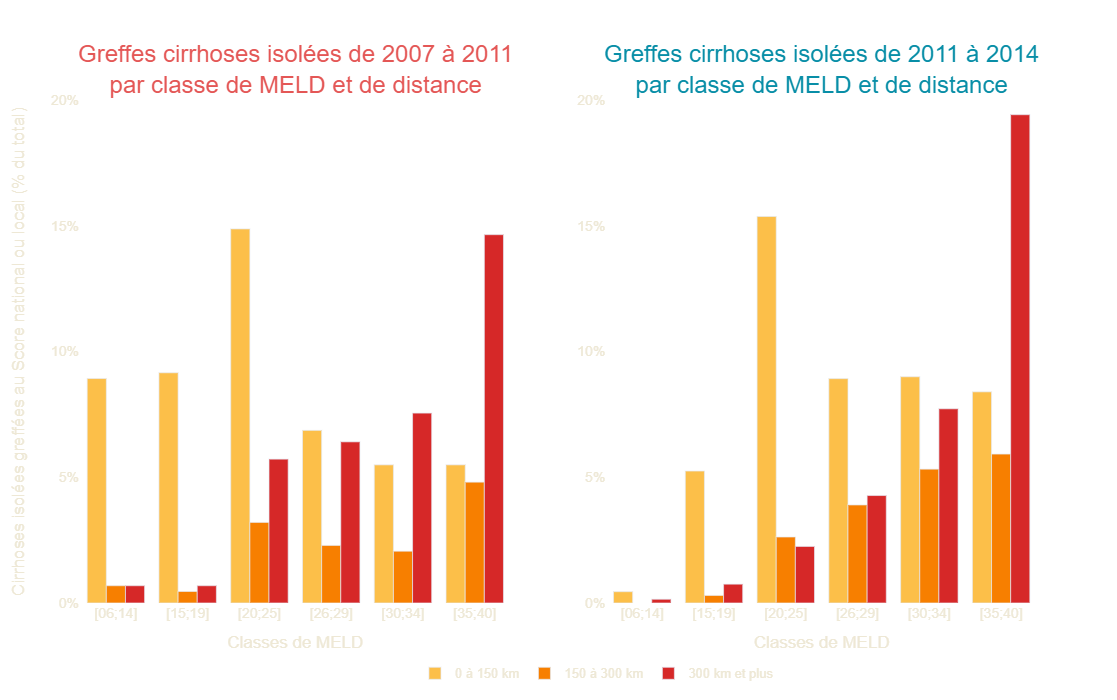

In [1655]:
df_meld = pd.read_json("./assets/json/df_F_MELDKM.json")
df_foie_cirrh_av = df_meld.query("period=='av'")
df_foie_cirrh_av = df_foie_cirrh_av.copy()
df_foie_cirrh_av['color'] = np.where(df_foie_cirrh_av['CLASSE_KM_VOITURE']=='0 à 150 km','#fcbf49',
                                     np.where(df_foie_cirrh_av['CLASSE_KM_VOITURE']=='150 à 300 km','#f77f00',
                                     '#d62828'))
df_foie_cirrh_ap = df_meld.query("period=='ap'")
df_foie_cirrh_ap = df_foie_cirrh_ap.copy()
df_foie_cirrh_ap['color'] = np.where(df_foie_cirrh_ap['CLASSE_KM_VOITURE']=='0 à 150 km','#fcbf49',
                                     np.where(df_foie_cirrh_ap['CLASSE_KM_VOITURE']=='150 à 300 km','#f77f00',
                                     '#d62828'))
    
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Greffes cirrhoses isolées de 2007 à 2011<br>par classe de MELD et de distance",
                    "Greffes cirrhoses isolées de 2011 à 2014<br>par classe de MELD et de distance"),
    vertical_spacing=0.075
)


for c in df_foie_cirrh_av.CLASSE_KM_VOITURE.unique():
    fig.add_trace(go.Bar(name=c,
                       x=df_foie_cirrh_av.query(f"CLASSE_KM_VOITURE=='{c}'").CLASSE_MELD,
                       y=df_foie_cirrh_av.query(f"CLASSE_KM_VOITURE=='{c}'").p,
                       marker_color= df_foie_cirrh_av.query(f"CLASSE_KM_VOITURE=='{c}'").color),
                  1,1)
    fig.add_trace(go.Bar(name=c,
                       x=df_foie_cirrh_ap.query(f"CLASSE_KM_VOITURE=='{c}'").CLASSE_MELD,
                       y=df_foie_cirrh_ap.query(f"CLASSE_KM_VOITURE=='{c}'").p,
                       marker_color= df_foie_cirrh_ap.query(f"CLASSE_KM_VOITURE=='{c}'").color,
                       showlegend=False),
                  1,2)

    
fig.update_layout(barmode='group')

fig.update_xaxes(title_text="Classes de MELD")

fig.update_yaxes(title_text="Cirrhoses isolées greffées au Score national ou local (% du total)",
                 range=[0, 0.2],
                 tickformat=',.0%')
fig['layout']['yaxis2']['title']=""

fig.update_layout(hovermode="closest",
                  font_color=color.gris,
                  font=font,
                  title_x=0.5,
                  title_y=0.85,
                  plot_bgcolor=bgcolor,
                  paper_bgcolor=bgcolor,
                  width=w,
                  height=h,
                  legend=dict(
                    orientation='h',
                    bgcolor=bgcolor,
                    bordercolor=bgcolor,
                    font=dict(size=13),
                    yanchor="top",
                    y=-0.11,
                    xanchor="left",
                    x=0.35
                ),
            )

fig['layout']['annotations'][0]['font']=dict(size=24, color="#E45756" )
fig['layout']['annotations'][1]['font']=dict(size=24, color="#088EA7" )

fig.show(config={'displayModeBar': False})

<font color='red' size=4>
    
Vous reconnaissez ce graphique, la répartition des greffes pour cirrhoses isolées par classe de MELD et de distance, avant et maintenance après le MG
Redistribution du MELD en fonction de la gravité : meilleur compromis entre l'urgence et la distance
- Quasiment plus aucune greffe cirrhose isolé MELD inf ou égal 14 
- Greffes même plus de MELD elevé dans la proximité, chose qui était compliqué avec le modèle additif

</font>

---

### Résultats : mortalité post-greffe

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/F_post_grf.png" class="rounded" alt="..." width=80%>
       </div>
   </div>  
</div>

<font color='red' size=4>

Il faut savoir que la durée d'ischémie froide à été réduite d'une heure entre les deux périodes
    
La survie post-greffe a été évaluée à trois ans. Sans et avec ajustement, la survie est significativement plus élevée pour les malades greffés lors de la mise en place du modèle gravitaire 

L’analyse du modèle de Cox montre un bénéfice de survie significatif sur la seconde période, sans et avec ajustement (HRa=0,83[0,75;0,92], p-value= 0,003)


</font>

---

### Résultats : modèle de Cox post-greffe

<div class="container" style = "background-color: #eee8d5;">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/table/cox.png" class="rounded" alt="..." width=80%>
       </div>
   </div>  
</div>

---

## Optimiser la gestion de la distance à l'aide d'un modèle gravitaire : conclusion

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/F_conclusion.png" alt="..." width=100%>
       </div>
   </div>  
</div>




<font color='red' size=4>

L'ajout d'un compromis urgence/distance permet aux malades les plus graves d'attirer un greffon, peu importe son éloignement. Les bons candidats mais moins urgents peuvent attirer les greffons proches.
    
- Ce compromis a permi de réduire de 15% l'incidence des décès sur liste
    
- On constate aussi une réduction de la durée d'ischémie froide, dont une partie pourrait être liée au remplacement de la gestion additive peut discriminante et qui "forçait" les malades les plus graves à aller chercher des greffons plus lointain, ce qui n'est plus le cas maintenant.

En terme d'apports scientifiques,
- Il s'agit d'un modèle multiplicatif en totale rupture avec ce qui est fait ailleurs
- Nous avons été contacté par l'UNOS, qui gère la transplantation aux USA, je reviendrai dessus à la fin
- Le MG a aussi été appliqué aux nouveaux score reins et coeur, nous devrions l'utiliser pour le futur score pancréas
 
Les limites : 
- Un modèle qui est complexe, qui doit être paramétré par simulations
- Des guides ont été développés pour aider les transplanteurs et patients
- Les résultats sont à relativiser
    - le MG a été mis en place en même temps que des modifications pour les CHC. Les analyses ont été également appliqué par sous groupes de maladies et donnent les mêmes résultats
    - Il y a eu de nouveaux traitements contre le VHC et une partie de la réduction de la durée d'ischémie froide est sans doute imputable à la mise en place du pôle national de régulation des greffons en 2011

  
</font>

---

<h1><i class="fas fa-helicopter"></i> Réduire la durée d'ischémie froide en simulant l'utilisation de nouveaux vecteurs de transport</h1>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/I_plan_4.png" alt="..." width=100%>
       </div>
   </div>  
</div>

<blockquote style="width: 1200px;"> 
Rédaction d'un article cet été
</blockquote>

<blockquote style="width: 1200px;"> 
Bayer, F., Audry, B., Malaquin, G., Huot, O., Kerbaul, F.. (2022, March). Comment optimiser les transports d’organes et d’équipes ? Symposium de la fédération de transplantation Sorbonne université.
</blockquote>

<blockquote style="width: 1200px;"> 
Bayer, F.. (2019, July). La géomatique à l’Agence de la biomédecine :usages et enjeux. In Les GeoDataDays 2019-Les journées nationales GÉONUMÉRIQUES de l'Afigéo et Décryptagéo.
</blockquote>

<font color='red' size=4>

Cette dernière étude porte sur l'optimisation les possibilités offertes par les outils informations de la géographie (géomatique)  combiné à l'épidémiologie pour proposer des solutions visant : 
- à réduire la durée d'ischémie froide par l'utilisation de vecteurs de transports innovants
- et l'impact de cette réduction sur la survie post-greffe 

</font> 

---

## Contexte : des difficultés liées au prélèvement et au transport

<div class="container">
   <div class="row" >
       <div class="text-center">
           <div class="r-stack">
              <img src="./assets/images/H_contexte_1.png" class="fragment fade-out" alt="..." width=100%>
              <img src="./assets/images/H_contexte_2.png" class="fragment fade-in-then-out" alt="..." width=100%>
              <img src="./assets/images/H_contexte_3.png" class="fragment fade-in-then-out" alt="..." width=100%> 
              <img src="./assets/images/H_distancepb.png" class="fragment fade-in-then-out" alt="..." width=100%> 
               
          </div>
       </div>
   </div>  
</div>

<font color='red' size=4>

- Difficulté à réduire la durée d'ischémie froide en greffe cardiaque, 3h30 en fr pour un écart-type de 50
- 5 à 6 prélèvements par jour, plutôt la nuit
- 6 à 10 avions privés pour les équipes

---
Sur la carte de droite, les sites de prélèvement à moins de 30 minutes en voiture d'un de ces aéroports en bleu, en rouge à plus de 30 minutes
- 65% des sites PMO à moins de 30 minutes d'un aéroport le jour
- 28% la nuit
- Fermeture des aéroports

---

- 100 à 300 km : trop court pour l'avion, trop long pour l'ambulance

Problématique d'efficacité lié à la logistique du transport d'organes, qui impacte la survie post-greffe    
    
</font> 

---

## Opportunités ?

<div class="row">
    <div class="column" style=" float: left;width: 45%; margin-right:15px;">
        <img style="margin-right:0px;margin-top:0px;" src="./assets/images/H_opp_helico.jpg" width="auto" height="500" />
    </div>
    <div class="column" style=" text-align:center; float: left;width: 45%; margin-right:15px;">
        <img style="margin-right:0px;margin-top:0px;" src="./assets/images/H_opp_drone.webp" width="auto" height="500" />
    </div>
</div>

<font color='red' size=4>

- 100 et 300 km correspond justement au rayon d'action des hélicoptères sanitaires
- Quelques transports d'organes sur 5 km par drone
- Mais il est difficile de mobiliser ces vecteurs pour faire des études épidémiologiques type cas/témoin
- J'ai proposé d'utiliser un système d'information géographique (SIG) pour simuler l'effet de ces vecteurs sur le transport des organes

</font> 

---

## Hypothèse 

<blockquote class="fs-3" style="width: 1200px;">
Les outils de la géomatique permettent de simuler l'utilisation de moyens de transports innovants afin de réduire significativement la duré d'ischémie froide et d'augmenter la survie post-greffe
</blockquote>    

---

<blockquote class="fs-4" style="width: 1200px;">
Cette hypothèse est challengée par l'utilisation de micro-simulations sur les principaux organes greffés et d'un modèle prédictif de survie en greffe cardiaque
</blockquote>  

<font color='red' size=4>

Les outils de la géomatique permettent de simuler l'utilisation de moyens de transports innovants afin de réduire significativement la duré d'ischémie froide et d'augmenter la survie post-greffe
    
Cette hypothèse est challengée par l'utilisation de micro-simulations sur les principaux organes greffés et d'un modèle prédictif de survie en greffe cardiaque

</font>

---

## Solution proposée : microsimulations pour déterminer le gain sur l'ischémie

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/H_calcul.png" class="rounded" alt="..." width=75%>
       </div>
   </div>  
</div>

<font color='red' size=4>

- Dans la base de données Cristal, nous ne disposons ni de la durée de transport, ni de la modalité de transport
    - Je recalcule le temps de trajet entre le site de prélèvement et l'équipe de greffe en fonction des différents vecteurs
    - Dans l'exemple, 2h par la route, 1h par l'hélicoptère. L'avion n'est pas possible pour ce trajet 

- En revanche, la durée d'ischémie froide est connue dans Cristal. Je peux donc calculer une durée d'ischémie froide simulée, c'est-à-dire la durée d'ischémie froide observée moins l'écart entre le scénario sans et avec l'hélicoptère. Ici, un gain d'une heure


</font>

---

## Population et méthodes 

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/H_eval_methodo.png" class="rounded" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>

Réseau de transport a été créé avec un SIG, afin de recalculer les temps de trajet de toutes les greffes adultes cardiaques, hépatiques, pulmonaires et rénales entre 2015 et 2019.
- Une analyse univariée sur tous les greffons permet d'évaluer les gains de l'hélicoptère et du drone par rapport aux autres vecteurs
- Un modèle prédictif de survie post-greffe
    - mais uniquement sur la greffe cardiaque et sur la distance 100 à 200 km
    - j'ai mis en place un training modèle basé sur un modèle de Cox. 
    - Dans le modèle, 
        - ischémie observée
        - antécédent de cancer 
        - et âge du donneur, 
    - qui sont des variables utilisées dans notre outil d'alerte des échecs de greffes cardiaques. Leur effet stable dans le temps pour mesurer la survie en font de bons facteurs d'ajustement pour notre modèle prédictif
    - après validation du modèle, j'ai remplacé les données de l'ischémie observé par l'ischémie simulée

    
</font>

---

### Résultats : simulations sur l'ensemble des greffons

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/H_gains.png" class="rounded" alt="..." width=50%>
       </div>
   </div>  
</div>

<font color='red' size=4>

Sur l'approche univariée je vais me concentrer sur les hélicoptères 
- 0 et 100 km, on confronte l'hélicoptère à l'ambulance : gain moyen de 10 minutes
- mais entre 100 et 200 km, gain moyen d'1h
- entre 200 et 300 km, je n'ai pas mis en concurrence l'avion et l'hélicoptère volontairement dans le manuscrit, afin de conserver une certaine cohérence et simplicité. Il aurait fallu utiliser des appareils avec des caractéristiques très différentes et qui ne sont pas disponibles sur l'ensemble du territoire

    
</font>

---

### Résultats : modèle prédictif de survie

In [5]:
import pandas as pd
df_H_predict = pd.read_feather("./assets/feather/H_predict.feather")
df_H_predict = df_H_predict.astype({'time': 'int32'})
df_H_predict

time variable      surv                 strata
0      0    total  1.000000    Trajet par la route
1      0    total  0.987139    Trajet par la route
2      2    total  0.965680    Trajet par la route
3      3    total  0.961326    Trajet par la route
4      4    total  0.956995    Trajet par la route
..   ...      ...       ...                    ...
77   162    total  0.871759  Trajet en hélicoptère
78   176    total  0.868953  Trajet en hélicoptère
79   187    total  0.866149  Trajet en hélicoptère
80   201    total  0.863343  Trajet en hélicoptère
81   331    total  0.860494  Trajet en hélicoptère

[82 rows x 4 columns]

In [1656]:
df_H_predict = pd.read_feather("./assets/feather/H_predict.feather")
df_H_predict = df_H_predict.astype({'time': 'int32'})

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_H_predict.query("strata=='Trajet en hélicoptère'")['time'],
    y=df_H_predict.query("strata=='Trajet en hélicoptère'")['surv'],
    line=dict(shape='hv', width=3, color='#e45756'),
    name = "En hélicoptère",
    hovertemplate=None
))

fig.add_trace(go.Scatter(
    x=df_H_predict.query("strata=='Trajet par la route'")['time'],
    y=df_H_predict.query("strata=='Trajet par la route'")['surv'],
    line=dict(shape='hv', width=3, color='#088ea7'),
    name = "En voiture",
    hovertemplate=None
))


fig.update_xaxes(title_text="Temps écoulé depuis la greffe (jour)")

fig.update_yaxes(title_text="Probalité de survie (%)",
                 range=[0, 1],
                 tickformat=',.0%')

fig.update_layout(
    title="""Courbes de survie à un an avec et sans hélicoptère, sur la distance 100 à 200 km en greffe cardiaque,
    <br> après ajustements à l'aide d'un modèle prédictif de Cox ajusté sur l'ischémie, âge du donneur et antécédents de cancer """,
    hovermode="x",
    font_color=color.gris,
    font=font,
    title_x=0.5,
    title_y=0.95,
    plot_bgcolor=bgcolor,
    paper_bgcolor=bgcolor,
    width=w,
    height=h,
    legend=dict(
      orientation='v',
      bgcolor=bgcolor,
      bordercolor=bgcolor,
      font=dict(size=13),
      yanchor="top",
      y=0.75,
      xanchor="left",
      x=0.01),
)



fig.show(renderer=renderer,config={'displayModeBar': False})



<font color='red' size=4>

Modèle prédictif en greffe cardiaque pour évaluer l'effet qu'aurait une réduction de l'ischémie froide sur la ditance 100 - 200 km en greffe cardiaque: 
- aire sous la courbe ROC 0.84
- observé 56 décès, le training modèle en prédit 56,3 
- Predict de la library survival R qui donne le nombre attendu d'événement and fonction des covariables et de la durée de suivi 
- en remplaçant l'ischémie observé par l'ischémie simulé : 28,3 décès, en lien avec une réduction d'une heure en moyenne de la durée d'ischémie froide 
- 75% de survie post-greffe observée à 1 an vs 86% dans le modèle prédictif (courbes généré avec ggadjustedcurves de survminer)

Complément    
- HR de l'ischémie dans le modèle ajusté et de 1,97 IC[1,36 ; 2,8}

</font>

---

### Résultats : précisions sur le modèle prédictif de survie

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/H_schoen.png" class="rounded" alt="..." width=100%>
       </div>
   </div>  
</div>


Pour les IC : 
> Robin Denz, Renate Klaaßen-Mielke, and Nina Timmesfeld (2022). A Comparison of Different Methods to Adjust Survival Curves for Confounders. arXiv:2203.10002v1

<font color='red' size=4>

- Ajout des variables du CUSUM dans le modèle permet d'améliorer la prédiction : ROC 0.84 vs 0.7 seulement avec l'Ischémie Froide
- vérification de l’hypothèse de proportionnalité des risques instantanés : tests de Schoenfeld. 
Pour les IC : 
> Robin Denz, Renate Klaaßen-Mielke, and Nina Timmesfeld (2022). A Comparison of Different Methods to Adjust Survival Curves for Confounders. arXiv:2203.10002v1   
    
</font>

---

## Résultats : l'hélicoptère, une alternative pour le transport d'organes sur des distances intermédiaires

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/H_biomed.png" width=50%>
       </div>
   </div>  
</div>

<font color='red' size=4>
L'hélicoptère, une alternative pour le transport d'organes sur des distances intermédiaires

Scénario très restrictif : 
- le gain de temps est sans doute supérieur à 1h. 
- Pas de concurence avec les avions dans les scénarios présentés, mais sur la distance 200-300 km des simulations avec des hélicoptères pouvant faire l'A/R sans avitailler montrent un gain de 30 minutes en moyenne

Contrairement à ce que laisse penser cette affiche de l'armée de terre, les hélicoptères ne sont pas utilisés pour le transport d'organe en métropole. Quels hélicoptères ? 
- Focalisé sur les Hélismur
- Vols possibles de nuit.
- cout moindre que l'avion privé grace àaux forfait 850€ v.s. 1500€/H
- Hors maintenance, les HéliSMUR ne volent pas 90% du temps
- Ne pas proposer l’hélicoptère pour tous les déplacements, mais uniquement lorsque le gain d’ischémie est important
- ne peut se faire que par la mise en place de projet pilote, avec des Helismur, les ARS et des centres greffeurs volontaires. 

</font>

## Résultats : les drones, une perspective à moyen et long terme

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/H_lifelines.webp" width=100%>
       </div>
   </div>  
</div>



<font color='red' size=4>

Les gains sur le temps de transport ne sont pas encore suffisant.
Prérequis techniques pour être plus performant que l’avion et l’ambulance  :
- eVTOL + aile porteuse, distance franchissable > 300 km et une vitesse de croisière > 150 km/h.
- Charge utile suffisante pour un conteneur, idéalement une machine à perfuser : pas le cas aujourd’hui pour un décollage vertical.

Avantages : 
- Pas de personnel à bord, ce qui réduit les risques
- Coûts d’exploitation faibles que l’avion et l’ambulance

Evolution de la réglementation UE et française. DGAC cherche des projets tests (contact Lifelines-ABM pour un test échantillon biologique)

Mais suppose de mettre en place une mutualisation du prélèvement d’organes et de tracer les greffons

</font>

---

## Optimiser la gestion de la distance à l'aide d'un modèle gravitaire : conclusion

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/H_conclusion.png" alt="..." width=100%>
       </div>
   </div>  
</div>




<font color='red' size=4>

Avec cette étude, j'ai montré que 
- l'utilisation des hélicoptère pouvaient au minimum réduire d'une heure la durée d'ischémie froide sur certaines distance
- ce qui permettrait de réduire les décès post-greffe à un an en greffe cardiaque

Les apports scientifiques et opérationnels sont multiples : 
- La construction d'un distancier national et multimodal incluant la route, l'avion, l'hélicoptère, le drone et bientôt le train / vol air france n'est pas commun.
- L'utilisation des hélicoptères seraient une solution face à la fermeture des aéroports, la plupart des sites de prélèvement et des équipes de greffe étant à moins de 200m d'une hélistation 
- Le Pr Kerbaul de l'Agence de la biomédecine m'a informé mardi dernier qu'il avait été contacté par le chef de la base hélicoptère de la Sécurité Civile de Paris. Ce dernier étant très intéressé par cette étude
- J'ai peu parlé des drones pour simplifier le message, mais cette étude à permis de définir des caractéristiques nécessaires pour que leur utilisation soit efficace. Nous pourrons revenir dessus si vous avez des questions
    
Concernant les limites : 
- Avec 56 décès observés dans cristal et 56,3 décès prédit dans le modèle, je me suis rapidement demandé si je n'overfittais pas le modèle prédictif. J'ai fait des tests de sensibilité sur le training modèle, de la cross-validation k-fold : les résultats étaient comparables
- Néanmoins, il est nécessaire de généraliser ce modèle à toutes les distances;
    - je l'ai limité aux distances où l'effet de la durée d'ischémie froide sur la survie était encore linéaire, ce n'est pas le cas au delà
    - Il faudrait au moins faire un modèle de Cox par classes de distances, ce qui n'est pas le cas dans le manuscrit


</font>

---

# Conclusion générale

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/I_plan_5.png" alt="..." width=100%>
       </div>
   </div>  
</div>

<font color='red' size=4>

Nous voici donc arrivé à la conclusion générale
    
</font>

---

## 
<h2> <i class="fas fa-globe"></i> Quelles réponses proposées face aux enjeux de la greffe ? </h2>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/C_reponses.png" alt="..." width=65%>
       </div>
   </div>  
</div>

<font color='red' size=4>
Quelles réponses proposées face aux enjeux de la greffe ?    
    
Dans cette thèse, j'ai abordé la géographie sous deux grands angles : 
- Premièrement, en optimisant la distance au sein des règles d'allocation. Soit en définissant des zones de prélèvement équitables ou bien en optimisant la notion de greffe en juste à temps à l’aide d’une fonction continue de la distance
- Deuxièmement, en proposant un moyen de réduire la durée de la composante transport de la durée d’ischémie froide. Une solution a été proposée via l’utilisation d’outils de la géomatique pour simuler les impacts de l’utilisation de nouveaux vecteurs
- Les différentes hypothèses que j'avais poser en introduction n'ont pas été contredites

    
</font>

---

## Principales difficultés rencontrées


<div class="container">
    <div class="row">
      <div class="col">
        <div class="card nb">
          <div class="card-body nb">
            <p class="card-title nb "><b>Rendre accessible des principes parfois abstraits</b></p>
            <p class="card-text nb">"Un problème bien posé est un problème à moitié résolu"</p>
            <p class="card-text nb">Trouver des représentations et modes de communication pertinents</p>
          </div>
        </div>
      </div>
      <div class="col">
        <div class="card nb">
          <div class="card-body nb">
            <p class="card-title nb "><b>Prendre du recul après plusieurs années à l'Agence de la biomédecine</b></p>
            <p class="card-text nb">Passer d'enjeux opérationnels à des enjeux scientifiques</p>
            <p class="card-text nb">Conception et évaluation de son propre modèle...</p>
          </div>
        </div>
      </div>
      <div class="col">
        <div class="card nb">
          <div class="card-body">
            <p class="card-title"><b>Des informations partiels sur les règles de répartition international</b></p>
            <p class="card-text">Vision pragmatique de la gestion de la distance</p>
            <p class="card-text">Qui énonce des principes, mais sans les détailler</p>
          </div>
        </div>
      </div>  
    </div>
</div>

<font color='red' size=4>

- Une  difficulté a été de rendre accessibles des principes parfois abstraits, 
    - je pense par exemple à la difficulté à représenter les effets du modèle gravitaire dans le temps et l'espace. 
    - Surtout face à la complexité d'un modèle multiplicatif. 
    - Je me suis donc attaché au principe ennoncé par Poincaré Bergson et sans doute d'autres: "Un problème bien posé est un problème à moitié résolu" .
    - Pour cela, je me suis grandement aidé de l’approche systémique très appréciés des géographes, ainsi que de notre très chère sémiologie graphique.
     
- Sur le fond, j'ai rencontré des difficultés à sortir du contexte de l'Agence. Le docteur Jacquelinet m'a dit un jour qu'il fallait que je choisisse entre ingénieur et chercheur. Il a raison, mais dans mon métier à l'Agence je dois faire les deux. La multidisciplinarité de la géographie et de mon travail n'aident pas à prendre du recul pour rédiger une thèse à temps partiel. J'ai donc essayé au maximum de prendre ce recul et de conserver une approche scientifique et critique sans pour autant tomber dans les détails opérationnels et techniques.
    - La prise de recul scientifique étant d'autant plus nécessaire lorsque l'on développe, met en place puis évalue ses propres modèles
    
- Concernant les sujets traités, ce qui m'a frappé est le caractère très obscur des modèles d'allocation géographique dans les différentes organisations chargées de la transplantation. Alors que la société attend de la santé publique de l'équité, de l'efficacité et de la transparence. Peut-être que dans un contexte hors COVID j'aurais pu / du plus échanger avec d'autres organisations   
    
</font>

---

## Le renouveau international de la géographie en greffe d'organe
<div class="r-stack">
    <div class="row fragment fade-in-then-out">
        <div class="column" style=" float: left;width: 45%; margin-right:15px;">
            <img style="margin-right:0px;margin-top:0px;" src="./assets/images/C_opos.png" width="auto" height="500" />
        </div>
        <div class="column" style=" text-align:center; float: left;width: 42.5%; margin-right:15px;">
            <img style="margin-right:0px;margin-top:0px;" src="https://i.imgur.com/cAfireZ.png" width="auto" height="500" />
        </div>
    </div>
    <div class="row fragment fade-in-then-out">
        <div class="column" style=" float: left;width: 45%; margin-right:15px;">
            <img style="margin-right:0px;margin-top:0px;" src="https://i.imgur.com/m8XwREp.png" width="auto" height="500" />
        </div>
        <div class="column" style=" text-align:center; float: left;width: 42.5%; margin-right:15px;">
            <img style="margin-right:0px;margin-top:0px;" src="./assets/images/C_alcorn.jpg" width="auto" height="500" />
        </div>
    </div>
</div>



<font color='red' size=4>

Par mes lectures, j'ai constaté que la plupart des organisations ont des approches encore très pragmatiques de la géographie, avec surtout une recherche d'optimisation des distances dans la construction de zones d'allocations, ainsi que des zones **égalitaires** en terme de prélèvement
    
Des composantes distances sont maintenant ajouté dans plusieurs score d'allocation, UK
    
--- 
    
Mais c'est le procès Hollman aux USA sur les questions d'équité d'accès à la greffe pulmonaire qui ont mis un coups de pied dans la fourmilière. Aux USA, la place de la géographie redevient centrale, au même niveau que la dimension médicale. Toutes les règles d'allocation sont en train d'être modifiée : continuous distribution
- Ils parlent de continuous, car avant ils classaient les malades dans des groupes et des zones d'allocations
- Maintenant ils additionnent des points pour chaque patient, sans sous groupe
- Et une gestion de la distance continue qui vient s'additionner (au sein de zone ?)
- Ce qui est remarquable, c'est la manière dont les réflexions ont été menées, avec un panel d'experts, de propositions, toutes disponibles sur leur site internet.
- Leur capacité de communication sur le sujet est également un modèle du genre 
    
Mais finalement, le paradigme qu'ils mettent en place est le même que le nôtre qui existe depuis 2006 avec le score rein puis le score foie.
    
-  Les scores proposées par Benoit Audry et le Dr Jacquelinet en 2006 et 2007 étaient déjà une rupture majeure, et aujourd'hui nous sommes toujours innovants dans notre recherche d'optimisation avec le modèle gravitaire.

    
</font>

---

## Quelle place de la géographie en santé publique et épidémiologie ?

<div class="r-stack">
	<div class="fragment fade-out" style="width: 1200px;">
        <blockquote class="fs-3" style="width: 1200px;">« La géographie de la santé est une mal-aimée de la géographie française […] mais elle est également une mal-aimée des spécialistes français de l’épidémiologie et de la santé publique » </blockquote>
        <blockquote class="fs-4" style="width: 1200px;">Gérard Salem, Géographie de la santé, santé de la géographie. Espace Populations Sociétés ; 1995</blockquote>
    </div>  
    <div class="fragment fade-in-then-out" style="width: 1200px;">
        <blockquote class="fs-3" style="width: 1200px;">« L’épidémiologie attend de la géographie qu’elle fasse preuve de son aptitude à décrire et expliquer l’organisation et la dynamique d’espaces, et les inégalités spatiales variées qui en sont la manifestation. »
        </blockquote>
        <blockquote class="fs-4" style="width: 1200px;">Emmanuel Vigneron, La géographie de la santé : un agenda qui se précise. Espace Populations Sociétés ; 1995</blockquote>
    </div>
</div>


<font color='red' size=4>

Je vais également prendre un peu de recul sur deux disciplines au cœur de cette thèse, puisque je les vis de l'intérieur : quelle est la place de la géographie en santé publique et épidémiologie ?
    
Gérard Salem, un des fer-de-Lance de la géographie de la santé en France, disait en 1995 que La géographie de la santé est une mal-aimée de la géographie française […] mais elle est également une mal-aimée des spécialistes français de l’épidémiologie et de la santé publique.

Dans le même ouvrage, Emmanuel Vigneron, un autre visage majeur de la géographie de la santé en France, précisait : L’épidémiologie attend de la géographie qu’elle fasse preuve de son aptitude à décrire et expliquer l’organisation et la dynamique d’espaces, et les inégalités spatiales variées qui en sont la manifestation.
       
Aujourd'hui, la place de la géographie en santé est peut-être un peu moins ambiguë en France. Mais cette géographie de la santé reste enfermée en épidémiologie entre cette vision descriptive qu'évoquent Yves Lacoste et une vision opérationnelle, accaparée par la géomatique. 
- Géocodage des malades, 
- calculer des temps de trajet aux services d'urgences
- ou encore modélisation des facteurs de risques environnementaux et leurs effets sur la population.
    
Quant aux géographes de la santé, ils n'oublient pas qu'ils sont aussi classés comme une science sociale, en s'intéressant à la construction et aux dynamiques qui lient les Hommes à leur territoire sous le prisme de la santé au sens large.

    
</font>

---

<h2> <i class="fas fa-globe"></i> Un carambolage des disciplines pour les réconcilier toutes </h2>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/C_carambolage.png" alt="..." width=75%>
       </div>
   </div>  
</div>


<font color='red' size=4>
    
De mon expérience, la géographie de la santé fait sens lorsqu'elle est abordée de manière multidisciplinaire. Je prendrai un exemple que vous connaissez bien ; la collaboration entre Grégoire REY , Stéphane RICAN et Eric JOUGLA avec la  Mesure des inégalités de mortalité par cause de décès - Approche écologique à l’aide d’un indice de désavantage social, publiée en 2011 et qui a donné le French Deprivation Index (FDEP), massivement utilisé pour des études écologiques en santé publique.
    
Je pense que c'est par une approche transversale à différentes disciplines que la géographie de la santé prend finalement toute sa saveur. 
    
Cette transversalité se retrouve 
- dans les thématiques abordées : transplantation, santé publique, transport. Je suis même allé pioché dans l'astrophysique
- dans les compétences acquises et mobilisées : algorithmie, approche scientifique, épidémiologie
- dans les métiers impliqués : géographie, informatique, santé
- dans les missions : toutes les études présentées ont un volet recherche, évaluation, opérationnelle et transmission du savoir

En prenant un peu de recul et pour revenir aux liens géographie, épidémiologie et santé publique, mes recherches dans le cadre de cette thèse ont permis modestement de créer un carambolage des disciplines pour les réconcilier toutes, ce qui correspond plutôt à ma vision de la géographie exposée en introduction

       
</font>

---

## Quels apports de la géographie de la santé et de la modélisation spatiale aux problématiques d’attribution des organes en transplantation ?

<blockquote class="fragment fs-3" style="width: 1200px;">La géographie, ça sert, aussi, à faire la <b>greffe</b></blockquote>

<div class="container fragment">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/images/C_survie.png" alt="..." width=75%>
       </div>
   </div>  
</div>

<blockquote class="fragment fs-3" style="width: 1200px;">La géographie, ça sauve, aussi, des <b>vies</b></blockquote>



<font color='red' size=4>
Pour conclure, Quels sont les apports de la géographie de la santé et de la modélisation spatiale aux problématiques d’attribution des organes en transplantation ?
    
Outre la multidisciplinarité qui permet de faire avancer la science, j'ai voulu de montrer dans cette thèse que dans le domaine de la transplantation, la géographie ne s'inscrit plus uniquement dans une logique pragmatique, mais qu'elle s'inscrit aussi : 
- dans une logique d'équité, notamment face aux disparités d'accès aux soins
- dans une logique de faisabilité, en ouvrant la porte à de nouveaux vecteurs de transport
    
Ce qui nous ramène à l'oeuvre d'Yves Lacoste que j'évoquais en introduction, finalement, la géographie, ça sert aussi à faire la greffe
    
---
    
- Mais pas seulement, car l'efficacité est aussi impactée par une meilleure utilisation de la géographie dans les modèles d'allocation.
- Je conclurai donc cette présentation en annonçant que la géographie, ça sauve aussi des vies


</font>

---

<div class="container">
        <div class="row align-middle">
          <div class="col">
              <h1>
              <div class=" cblanc" style="padding-top: 35px;">
                <div class="fas fa-lungs"> </div>
                <div class="fas fa-arrows-to-circle"></div> 
                <div class="fas fa-helicopter"></div> 
                  Merci pour votre attention
            </div>
             </h1>
          </div>
        </div>
</div>

<font color='red' size=4>

- Je voudrais en premier lieu remercier Mme Leffondré et Mr Boulier d'avoir accepté d'être rapporteurs de cette thèse. Merci pour vos précieuses remarques concernant le manuscrit. J'ai essayé d'inclure plusieurs réponses à vos commentaires dans cette soutenance. Mais pour des questions de temps et de fluidité de cette soutenance, les autres pourrons être traitées durant la séance de questions/réponses
- Je voudrais également remercier les autres membres ayant accepté de participer à ce jury : Mrs Mercier, Tsimaratos et Tuppin. Merci pour vos relecture, le temps que vous y avez passé et merci de participer à cette soutenance.
- Merci au Dr Jacquelinet, mon ancien maitre de stage, mon supérieur actuel et mon directeur de thèse. J'ai beaucoup appris grace à lui et nos échanges ont été très précieux pour mener à bien et rédiger cette thèse.
- Merci à Madame Corto-Boucher d'être présente aujourd'hui, en tant que Directrice de l'Agence de la biomédecine mais aussi du laboratoire
- Enfin, un grand merci à tous mes collègues, aux membres de l'EDSP et du l'équipe REIN-COEUR-VIH, anciens enseignants, étudiants, stagiaires. Certains pour m'avoir fait et pour me faire encore confiance à l'Agence de la biomédecine sur de nombreux sujets qui ne sont pas tous traités dans cette thèse. D'autre pour les connaissances acquisent et leurs soutiens. 
- Enfin, un grand merci à ma maman, ma soeur, Michel d'avoir cru en mois même si cela n'a pa toujours été facile. Un grand merci à Marina et à Thomas pour leur soutien durant ces mois de rédaction et de préparation à la soutenance.

</font>

---

In [1657]:
script = """
this.nextElementSibling.focus();
this.dispatchEvent(new KeyboardEvent('keydown', {key:'s', keyCode: 83, ctrlKey: true}));
"""
display(HTML((
    '<img src onerror="{}" style="display:none">'
    '<input style="width:0;height:0;border:0">'
).format(script)))

In [1658]:
%%bash
/home/florian/miniconda3/envs/geo/bin/jupyter nbconvert Soutenance.ipynb --to slides --SlidesExporter.reveal_theme=moon --SlidesExporter.reveal_number=true --SlidesExporter.theme=dark --template custom_reveal --no-input

[NbConvertApp] Converting notebook Soutenance.ipynb to slides
[NbConvertApp] Writing 5491392 bytes to Soutenance.slides.html
